## Image Classifier

In [1]:
import pandas as pd 
import numpy as np 
import cv2
import matplotlib.pylab as plt
from glob import glob #he glob module finds all the pathnames matching a specified pattern

### Reading in Images

In [2]:
grade_0 = glob(r'D:\DataScienceKurs\retinopathy-classifier\data\grouped\grade_0\*.tif')
grade_1 = glob(r'D:\DataScienceKurs\retinopathy-classifier\data\grouped\grade_1\*.tif')
grade_2 = glob(r'D:\DataScienceKurs\retinopathy-classifier\data\grouped\grade_2\*.tif')
grade_3 = glob(r'D:\DataScienceKurs\retinopathy-classifier\data\grouped\grade_3\*.tif')

#### Example of one image

OpenCV is an open-source computer vision library that provides tools for image and video processing, object detection, and machine learning.

In [3]:
img_mpl = plt.imread(grade_0[3]) #returns a NumPy array with Pixels
img_cv2 = cv2.imread(grade_0[3])
img_mpl.shape, img_cv2.shape

#height,width, channel (RGB color has 3)
#cv2 reads in channel BGR, where matplotlib in RGB

((1488, 2240, 3), (1488, 2240, 3))

### Flattening the matrix and plotting pixel distribution

RGB has 3 channels (Red, Green, Blue)

Each channel has a value between 0 and 255 (if it's an 8-bit image).

So a pixel might look like: (255, 0, 0) = pure red

<Axes: title={'center': 'Distribution of Pixel Values'}, ylabel='Frequency'>

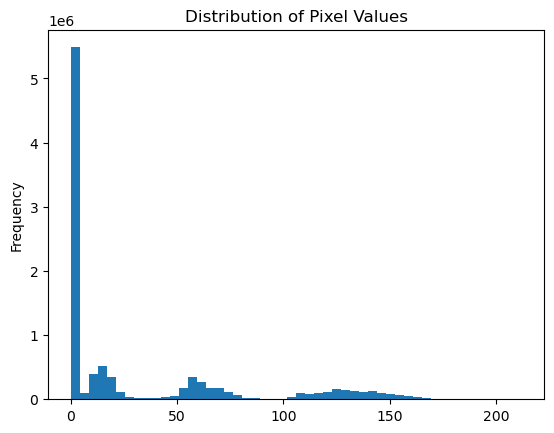

In [4]:
pd.Series(img_mpl.flatten()).plot(kind='hist',bins=50,title ="Distribution of Pixel Values")
# pixels are from 0 to 255 and we can see the distribution of them in given image

### Display Images

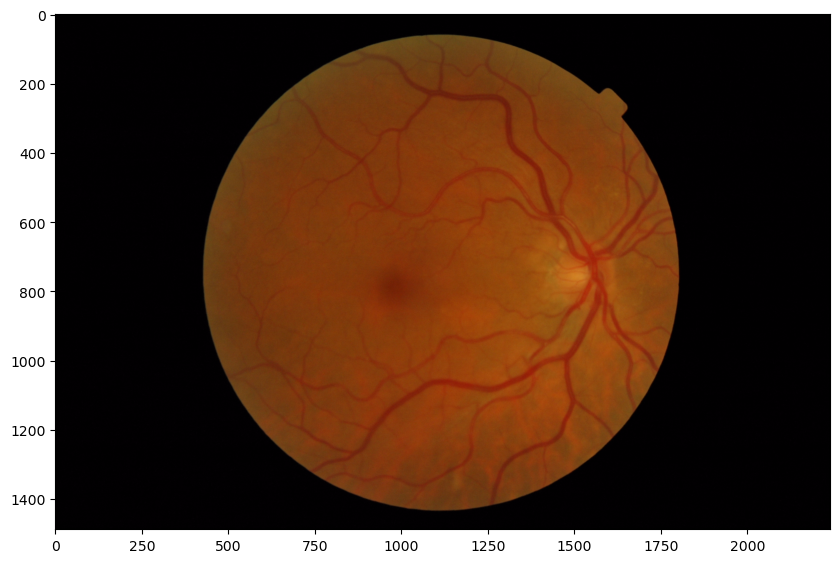

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img_mpl)
plt.show()

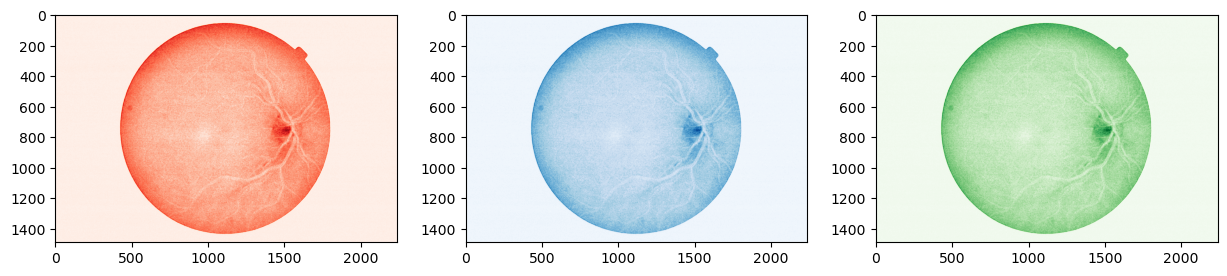

In [6]:
fig, axs = plt.subplots(1,3,figsize=(15,5))

axs[0].imshow(img_mpl[:,:,2], cmap='Reds')
axs[1].imshow(img_mpl[:,:,2], cmap='Blues')
axs[2].imshow(img_mpl[:,:,2], cmap='Greens')

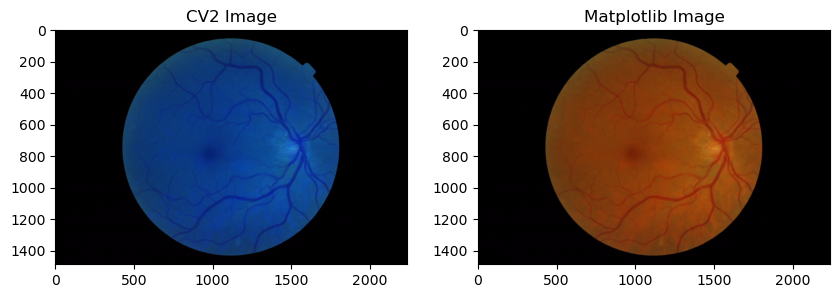

In [7]:
fig, axs = plt.subplots(1,2, figsize = (10,5))
axs[0].imshow(img_cv2)
axs[1].imshow(img_mpl)
axs[0].set_title("CV2 Image")
axs[1].set_title("Matplotlib Image")
plt.show()

### Converting BGR to RGB

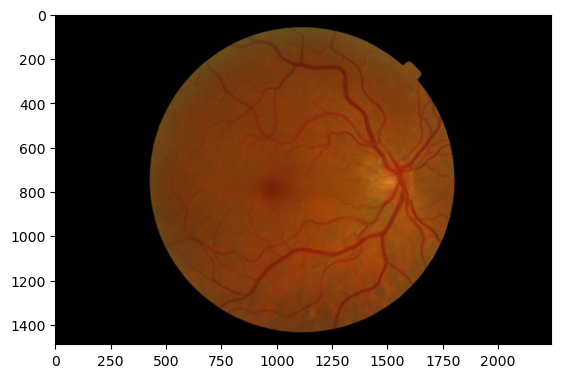

In [10]:
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
plt.show()

### Image Manipulation

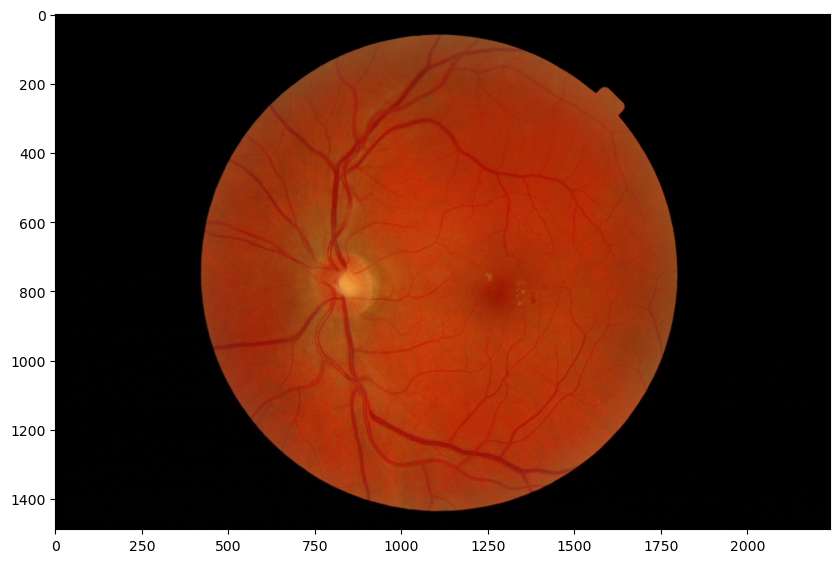

In [11]:
img = plt.imread(grade_3[30])
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
plt.show()


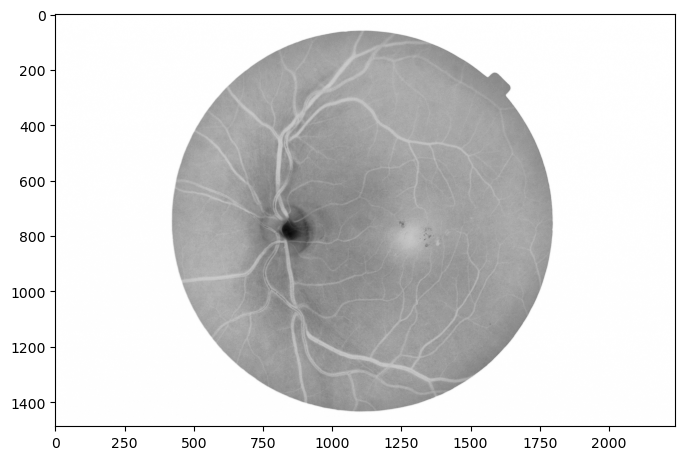

In [14]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_gray,cmap ='Greys')
plt.show()

### Resizing and Scaling

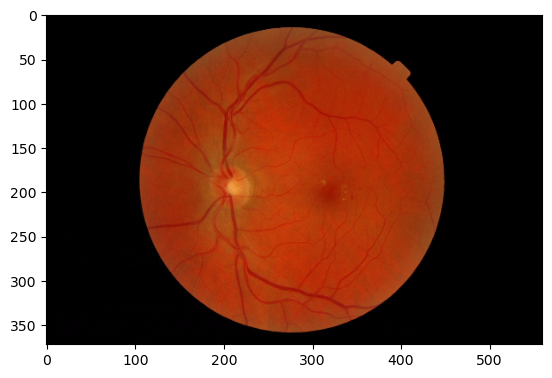

In [ ]:
img_resized = cv2.resize(img, None, fx = 0.25, fy = 0.25) # actual size of the image ( 25% smaller than original)
fig, ax = plt.subplots(figsize=(8,8)) # display size of the image
ax.imshow(img_resized)
plt.show()

In [18]:
img_resized.shape

(372, 560, 3)

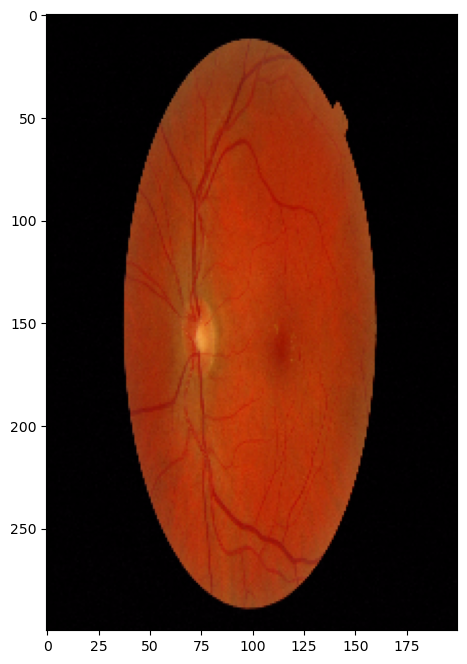

In [21]:
img_resize = cv2.resize(img,(200,300))
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(img_resize)
plt.show()

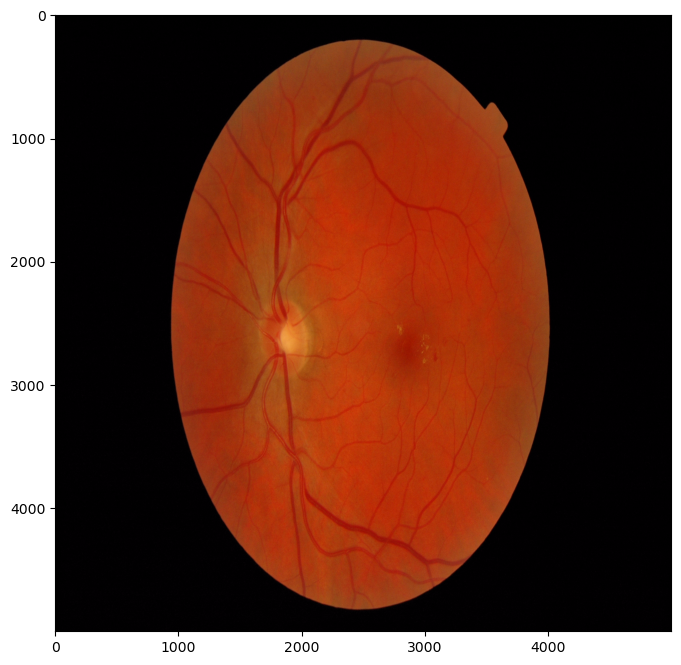

In [23]:
img_resize1 = cv2.resize(img, (5000,5000), interpolation = cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(img_resize1)
plt.show()

In [25]:
img_resize1.shape

(5000, 5000, 3)

### Kernels in Computer Vision

A small matrix (e.g., 3×3 or 5×5) used for image processing tasks like smoothing, edge detection, blurring, etc.

The kernel slides over the image and modifies pixels based on their surrounding values.

filter2D - modifies each pixel in the image by combining it with its neighbors, using a matrix (called a kernel or filter) that defines how the combination happens.

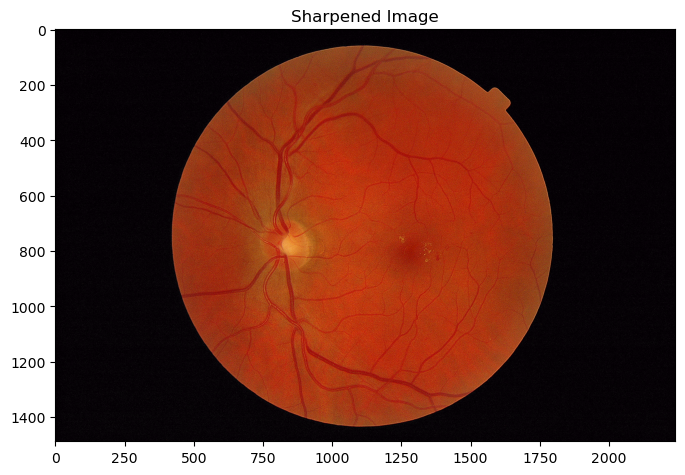

In [27]:
# Sharpen the image

kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9 ,-1],
                              [-1,-1,-1]])

sharpened_img = cv2.filter2D(img, -1, kernel_sharpening)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(sharpened_img)
ax.set_title('Sharpened Image')
plt.show()


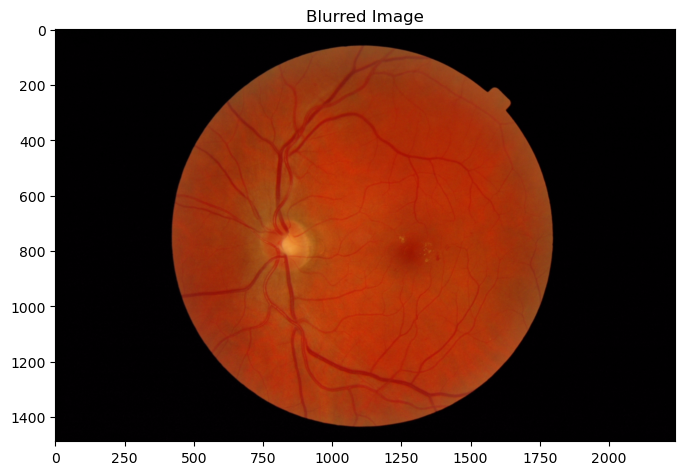

In [31]:
# Blurring the image
kernel_3x3 = np.ones((3,3), np.float32) / 9
blurred = cv2.filter2D(img, -1 ,kernel_3x3)
fig, ax = plt.subplots(figsize = (8,8))
ax.imshow(blurred)
ax.set_title('Blurred Image')
plt.show()